In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# Bootstrap resampling

### Learning goals - *Bootstrap resampling*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand how resampling can estimate confidence intervals.</div> |  |

In [2]:
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("bmh")
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

### Example

You record the time interval between spikes for a neuron (see simulated `spike_intervals` below).

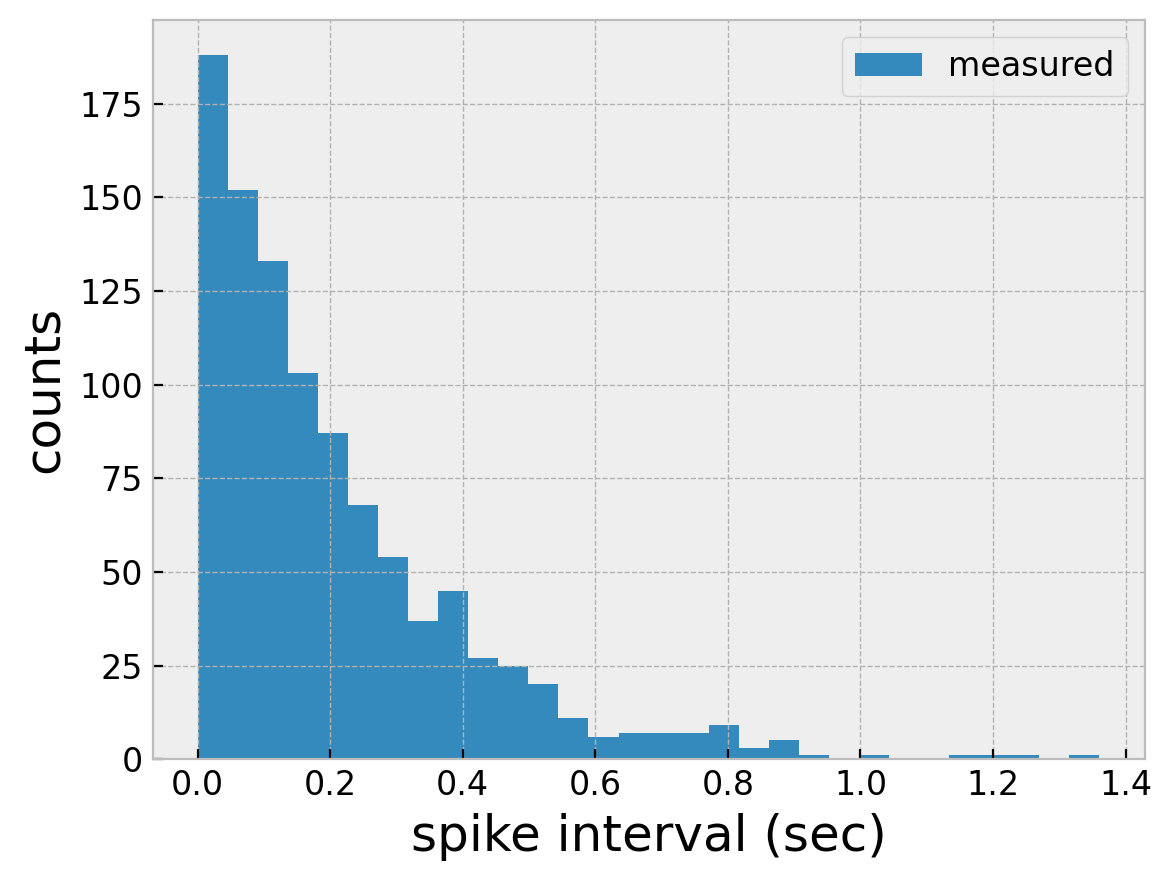

In [3]:
# simulated data
spike_intervals = st.expon.rvs(0, 0.2, size=1000)

plt.hist(spike_intervals, bins=30, label='measured')
plt.xlabel('spike interval (sec)')
plt.ylabel('counts')
plt.legend();

What is your best estimate of the neuron's spike rate based on your sample data?

In [4]:
spike_rate = 1 / spike_intervals.mean()

print(f"Estimate of mean spike rate is {spike_rate :.3f} Hz.")

Estimate of mean spike rate is 4.858 Hz.


How confindent are you in this estimate of the spike rate?

If you were to compare this neuron to another neuron, how would you decide wether or not they were the same or different types of spiking neurons?

e.g., Image you measure an average spike rate of 5.4 Hz from another neuron.

What does this tell you about spiking in these two neurons?

In [5]:
print(f"Neuron A: average spike rate = {spike_rate :.3f} Hz")
print(f"Neuron B: average spike rate = 5.4 Hz")

Neuron A: average spike rate = 4.858 Hz
Neuron B: average spike rate = 5.4 Hz


Construct a 95% bootstrap confidence interval for the neuron's spike rate.

* An interval of spike rates that is 95% likely to contain the neuron's true average spike rate.
* A distribution of spike rates you would expect to observe by random chance for repeated measurements from this or similar neurons.

But first, an example of random choice with replacement.

In [6]:
x = list(range(6))
print(x)

[0, 1, 2, 3, 4, 5]


In [7]:
# Five random selections of the same size as x with replacement.
for i in range(5):
    x2 = np.random.choice(x, size=len(x), replace=True)
    print(x2)

[4 1 5 3 0 3]
[3 2 3 0 0 0]
[1 0 3 1 0 4]
[1 3 3 4 3 5]
[2 5 0 2 2 0]


Construct a 95% bootstrap confidence interval for the neuron's spike rate.

In [8]:
n_bootstraps = 1000

# create memory for spike rates from each bootstrap resampling
bootstrap_spike_rates = np.zeros(n_bootstraps)

# Create each bootstrap sample set from the original observations
# and compute its estimated spike rate
for i in range(n_bootstraps):
    # bootstrapped sample data set
    bootstrap_sample = np.random.choice(spike_intervals, size=spike_intervals.shape, replace=True)
    
    # store spike rate for bootstrapped sample
    bootstrap_spike_rates[i] = 1 / bootstrap_sample.mean()

Plot the distribution of bootstrapped spike rates.

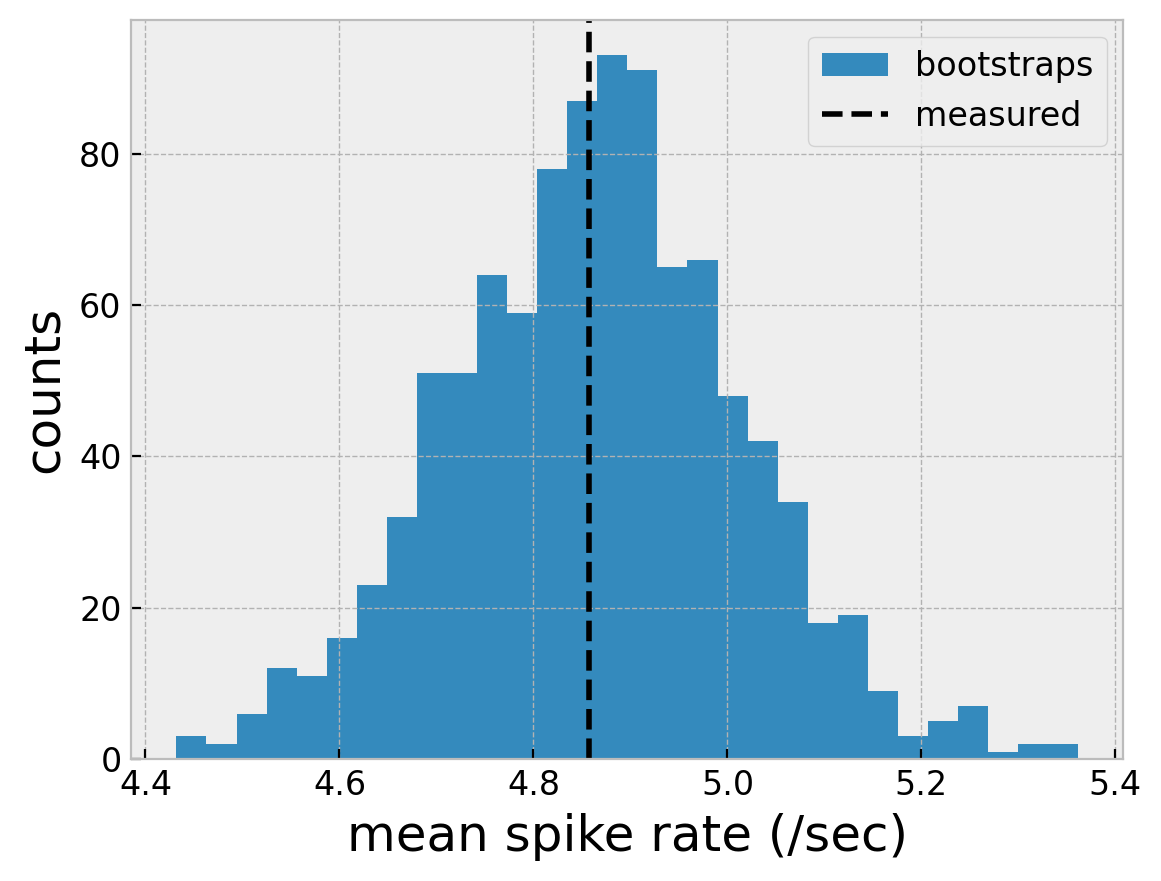

In [9]:
plt.hist(bootstrap_spike_rates, 30, label='bootstraps')
plt.axvline(spike_rate, ls='--', c='black', label='measured')
plt.xlabel('mean spike rate (/sec)')
plt.ylabel('counts')
plt.legend();

Set the 95% confidence limits based on the 2.5% and 97.5% quantiles.

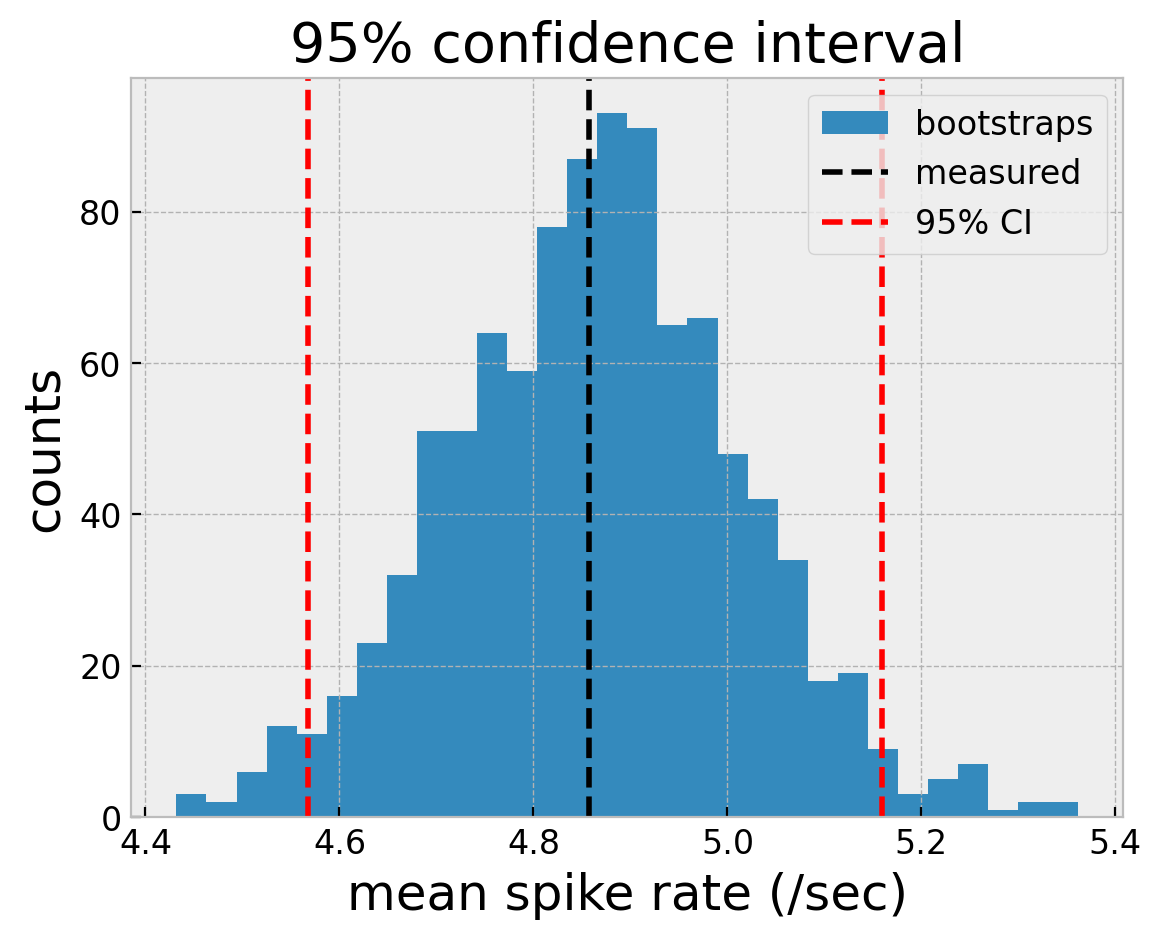

In [10]:
lb, ub = np.quantile(bootstrap_spike_rates, [0.025, 0.975])

plt.hist(bootstrap_spike_rates, 30, label='bootstraps')
plt.axvline(spike_rate, ls='--', c='black', label='measured')
plt.axvline(lb, ls='--', c='red', label='95% CI')
plt.axvline(ub, ls='--', c='red')
plt.xlabel('mean spike rate (/sec)')
plt.ylabel('counts')
plt.title('95% confidence interval')
plt.legend();

If you measure an average spike rate of 5.4 Hz from another neuron, what does this tell you about this new neuron as compared to the neuron you obtained your earlier recording from?

### Example

You measure a protein's expression level in each of 100 cells (see simulated `expr_levels` below).

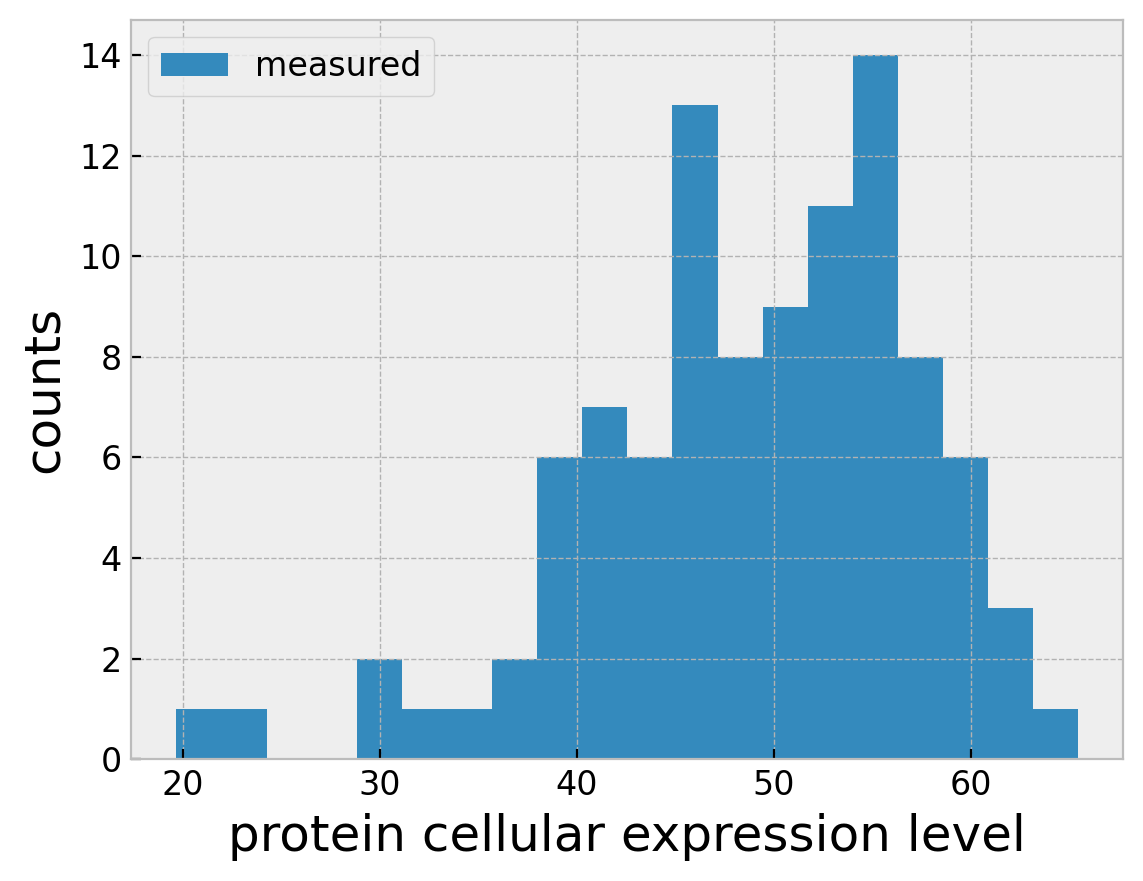

In [11]:
expr_levels = st.norm.rvs(50, 10, size=100)

plt.hist(expr_levels, 20, label='measured')
plt.xlabel('protein cellular expression level')
plt.ylabel('counts')
plt.legend();

What is your best estimate of the mean and standard deviation in protein expression levels in the population of cells based on your sample data?

In [12]:
mu = expr_levels.mean()
sd = expr_levels.std()

mu, sd

(48.86233960344289, 8.436299643718986)

How confindent are you in these estimates for the mean and standard deviation in protein expression levels?

If you were to compare this the expression level of the same protein in another population of cells, how would you decide wether or not the two cell populations differ in terms of their expression of this protein?

Using Central Limit Theorem, what is the 95% confidence interval for your estimate of the mean expression level?

In [13]:
n = len(expr_levels)
mu = expr_levels.mean()
sem = expr_levels.std() / np.sqrt(n)

lb, ub = st.norm.ppf([0.025, 0.975], mu, sem)
lb, ub

(47.20885525699516, 50.515823949890624)

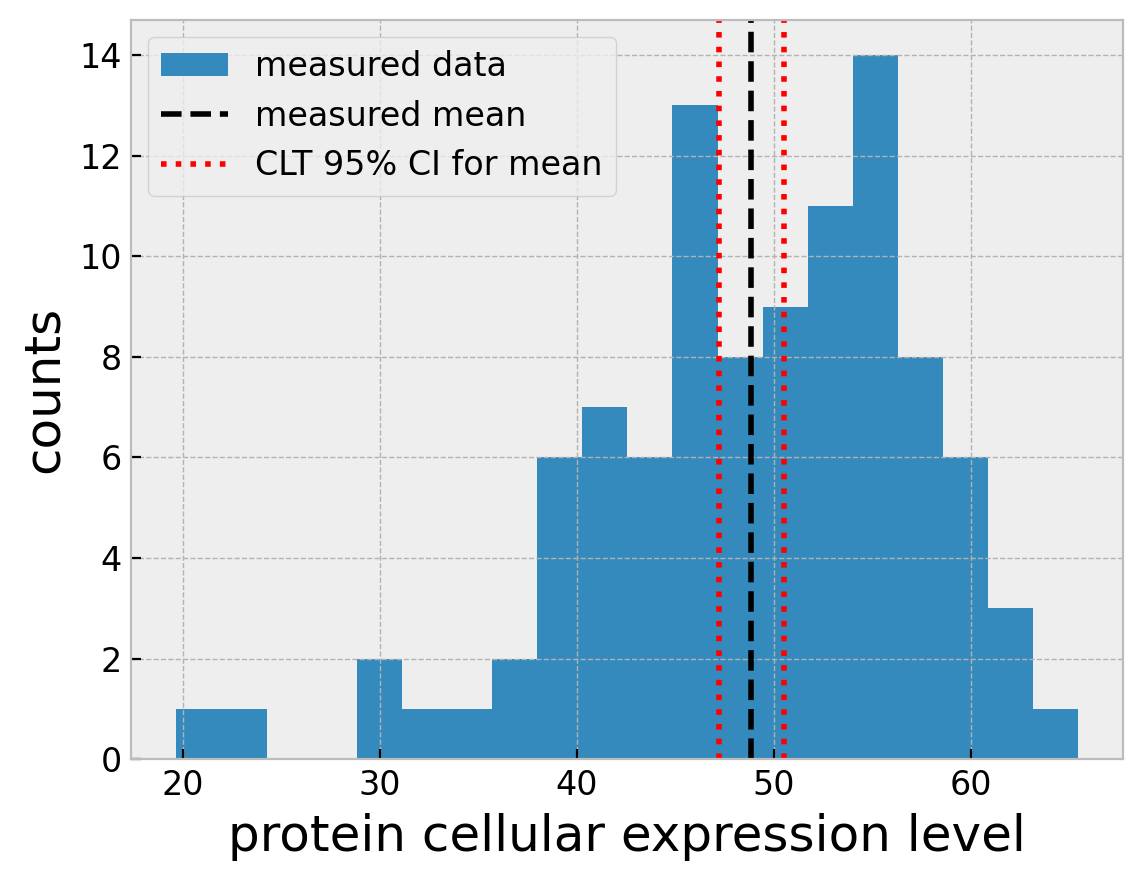

In [14]:
# CLT mean and 95% CI
plt.hist(expr_levels, 20, label='measured data')
plt.axvline(mu, ls='--', color='black', label='measured mean')
plt.axvline(lb, ls=':', color='red', label='CLT 95% CI for mean')
plt.axvline(ub, ls=':', color='red')
plt.xlabel('protein cellular expression level')
plt.ylabel('counts')
plt.legend();

What is the 95% confidence interval for your estimate of the standard deviation in expression levels?

Maybe two cell populations express roughly the same amount of protein on average, but differ wildly in cell to cell variability in this expression.

Can we use Central Limit Theorem for this?

In [15]:
expr_levels.std()

8.436299643718986

Use bootstrap to find the 95% confidence interval for your estimates of both the mean and standard deviation in expression levels?

In [16]:
n_bootstraps = 1000

bootstrap_means = np.zeros(n_bootstraps)
bootstrap_stds = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    bootstrap_sample = np.random.choice(expr_levels, size=expr_levels.shape, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_stds[i] = bootstrap_sample.std()

meanCI = np.quantile(bootstrap_means, [0.025, 0.975])
stdCI = np.quantile(bootstrap_stds, [0.025, 0.975])

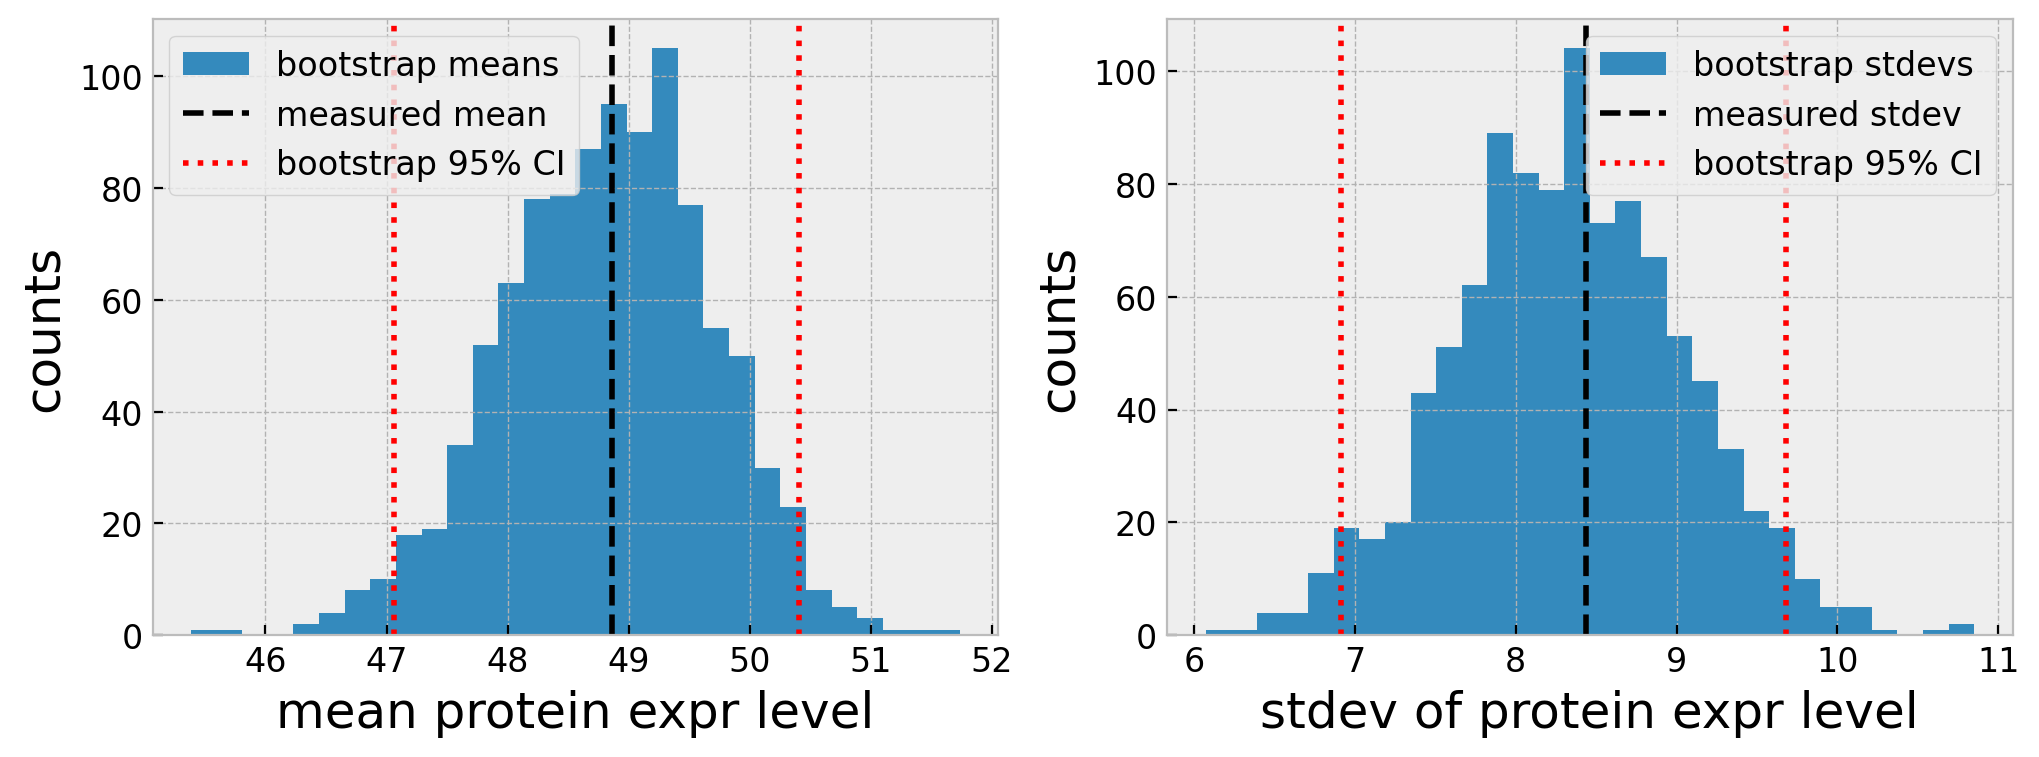

In [17]:
# mean, std and CIs
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(bootstrap_means, 30, label='bootstrap means')
plt.axvline(expr_levels.mean(), ls='--', color='black', label='measured mean')
plt.axvline(meanCI[0], ls=':', color='red', label='bootstrap 95% CI')
plt.axvline(meanCI[1], ls=':', color='red')
plt.xlabel('mean protein expr level')
plt.ylabel('counts')
plt.legend();
plt.subplot(1, 2, 2)
plt.hist(bootstrap_stds, 30, label='bootstrap stdevs')
plt.axvline(expr_levels.std(), ls='--', color='black', label='measured stdev')
plt.axvline(stdCI[0], ls=':', color='red', label='bootstrap 95% CI')
plt.axvline(stdCI[1], ls=':', color='red')
plt.xlabel('stdev of protein expr level')
plt.ylabel('counts')
plt.legend();

Imagine you measured experssion levels for this protein in a new type of cell. You obtained a mean expression level of 49 and a standard deviation of 15. What can you conlcude about the expression of this protein in these two cell types?

### Learning goals - *Bootstrap resampling*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand how resampling can estimate confidence intervals.</div> |  |